# San Antonio 311 Service Calls Analysis

## Table of Contents


Intro
- Goals
- Things to investigate
- Imports

Acquire
- Retrieve service call data
- Download the data dictionary provided by San Antonio

Prep
- Check for nulls and address them appropriately
- Rename columns for understandabilty and ease of typing
- Analyze each column individually to better understand the data
- Convert dates to datetime and analyze
- Drop remaining nulls

Feature Engineering

Explore
- Are service calls accurately split up by district?



## Intro

Goals:
- Explore service calls that San Antonio received in the past year
- Determine target variables and appropriate model type

Things to investigate:
- Do specific districts have higher service calls requests, specifically by type?
- Which types of service calls have the longest service times?
- Is there a certain district that is consistently late? 
- What is the population of district to service calls ratio?


In [190]:
# data manipulation
import pandas as pd
import numpy as np
from datetime import datetime

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Acquire

#### Retrieve service call data

In [191]:
df = pd.read_csv("allservicecalls.csv")

In [192]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590016 entries, 0 to 590015
Data columns (total 17 columns):
Category                590016 non-null object
CASEID                  590016 non-null int64
OPENEDDATETIME          590016 non-null object
SLA_Date                589959 non-null object
CLOSEDDATETIME          563276 non-null object
Late (Yes/No)           590016 non-null object
Dept                    589875 non-null object
REASONNAME              590016 non-null object
TYPENAME                590016 non-null object
CaseStatus              590016 non-null object
SourceID                590016 non-null object
OBJECTDESC              590016 non-null object
Council District        590016 non-null int64
XCOORD                  590016 non-null int64
YCOORD                  590016 non-null int64
Report Starting Date    590016 non-null object
Report Ending Date      590016 non-null object
dtypes: int64(4), object(13)
memory usage: 76.5+ MB


,Category,CASEID,OPENEDDATETIME,SLA_Date,CLOSEDDATETIME,Late (Yes/No),Dept,REASONNAME,TYPENAME,CaseStatus,SourceID,OBJECTDESC,Council District,XCOORD,YCOORD,Report Starting Date,Report Ending Date
0,Information,1010056445,10/18/2011,10/27/2011,11/14/2018,YES,Customer Service,311 Call Center,Customer Satisfaction,Closed,Web Portal,"19399 NW MILITARY HY, San Antonio, 78257",8,2104251,13774290,11/9/2018,11/9/2019
1,Information,1010058206,10/19/2011,10/28/2011,11/14/2018,YES,Customer Service,311 Call Center,Customer Satisfaction,Closed,Web Portal,"19399 NW MILITARY HY, San Antonio, 78257",8,2104251,13774290,11/9/2018,11/9/2019
2,Information,1010075875,10/31/2011,11/10/2011,11/14/2018,YES,Customer Service,311 Call Center,Customer Satisfaction,Closed,Web Portal,"1106 ELLISON DR S, San Antonio, 78245",4,2070537,13702644,11/9/2018,11/9/2019
3,Information,1010115259,12/1/2011,12/13/2011,11/14/2018,YES,Customer Service,311 Call Center,Customer Satisfaction,Closed,Web Portal,PLAZA DE ARMAS and COMMERCE ST W,1,2129213,13702278,11/9/2018,11/9/2019
4,Streets & Infrastructure,1010126853,12/10/2011,12/11/2011,NaN,YES,Trans & Cap Improvements,Storm Water,Tree Fallen,Open,Constituent Call,ELM CREEK and WURZBACH RD,8,2113584,13747492,11/9/2018,11/9/2019


#### Download the data dictionary provided by San Antonio

In [193]:
data_dict = pd.read_csv("datadict.csv")
data_dict

,column,type,label,description
0,Category,text,CATEGORY,This general category was developed to place 3...
1,CASEID,text,CASEID,The unique case reference number is assigned b...
2,OPENEDDATETIME,timestamp,OPENEDDATETIME,The date and time that a case was submitted.\r\n
3,SLA_Date,timestamp,SLA_Date,Every service request type has a due date assi...
4,CLOSEDDATETIME,timestamp,CLOSEDDATETIME,The date and time that the case/request was wa...
5,Late (Yes/No),text,Late (Yes/No),This indicates whether the case has surpassed ...
6,Dept,text,Dept,The City department to whom the case is assign...
7,REASONNAME,text,REASONNAME,The department division within the City deaprt...
8,TYPENAME,text,TYPENAME,The service request type name for the issue be...
9,CaseStatus,text,CaseStatus,The status of a case which is either open or c...


In [194]:
# print descriptions for easier viewing
for x in data_dict.description:
    print(x)

This general category was developed to place 311 services in a high level category, different than their respective department.

The unique case reference number is assigned by the 311 Lagan customer relationship management system.

The date and time that a case was submitted.

Every service request type has a due date assigned to the request, based on the request type name.  The SLA Date is the due date and time for the request type based on the service level agreement (SLA).  Each service request type has a timeframe in which it is scheduled to be addressed.

The date and time that the case/request was was closed.  If blank, the request has not been closed as of the Report Ending Date.

This indicates whether the case has surpassed its Service Level Agreement due date for the specific service request.

The City department to whom the case is assigned.

The department division within the City deaprtment to whom the case is assigned.

The service request type name for the issue being r

## Prepare

#### Check for nulls and address them appropriately 

In [195]:
df.isnull().sum()

Category                    0
CASEID                      0
OPENEDDATETIME              0
SLA_Date                   57
CLOSEDDATETIME          26740
Late (Yes/No)               0
Dept                      141
REASONNAME                  0
TYPENAME                    0
CaseStatus                  0
SourceID                    0
OBJECTDESC                  0
Council District            0
XCOORD                      0
YCOORD                      0
Report Starting Date        0
Report Ending Date          0
dtype: int64

Nulls to address
- `SLA_Date` is the due date of the service request. Why are there nulls? Are there certain service request types that don't require a due date? Need to explore more. 
- `CLOSEDDATTIME` has nulls, as they are still open cases. Will replace with placeholder "open". 
- `Dept` states which department the case is assigned. Do some cases not get assigned? Did they fall in a crack? Are they too new and haven't been assigned a department yet? 

>Will explore data more to better understand how to address nulls for `SLA_Date` and `Dept`

#### Rename columns for understandabilty and ease of typing

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590016 entries, 0 to 590015
Data columns (total 17 columns):
Category                590016 non-null object
CASEID                  590016 non-null int64
OPENEDDATETIME          590016 non-null object
SLA_Date                589959 non-null object
CLOSEDDATETIME          563276 non-null object
Late (Yes/No)           590016 non-null object
Dept                    589875 non-null object
REASONNAME              590016 non-null object
TYPENAME                590016 non-null object
CaseStatus              590016 non-null object
SourceID                590016 non-null object
OBJECTDESC              590016 non-null object
Council District        590016 non-null int64
XCOORD                  590016 non-null int64
YCOORD                  590016 non-null int64
Report Starting Date    590016 non-null object
Report Ending Date      590016 non-null object
dtypes: int64(4), object(13)
memory usage: 76.5+ MB


In [197]:
df.rename(columns={"Category":"category","CASEID":"id","OPENEDDATETIME":"open_date","SLA_Date":"due_date",
                   "CLOSEDDATETIME":"close_date", "Late (Yes/No)":"late", "Dept":"dept", "REASONNAME":"city_department",
                  "TYPENAME":"department_division","CaseStatus":"status","SourceID":"source","OBJECTDESC":"location",
                  "Council District":"district_no","XCOORD":"x_cord","YCOORD":"y_cord","Report Starting Date":"start_date",
                  "Report Ending Date":"end_date"}, inplace=True)

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590016 entries, 0 to 590015
Data columns (total 17 columns):
category               590016 non-null object
id                     590016 non-null int64
open_date              590016 non-null object
due_date               589959 non-null object
close_date             563276 non-null object
late                   590016 non-null object
dept                   589875 non-null object
city_department        590016 non-null object
department_division    590016 non-null object
status                 590016 non-null object
source                 590016 non-null object
location               590016 non-null object
district_no            590016 non-null int64
x_cord                 590016 non-null int64
y_cord                 590016 non-null int64
start_date             590016 non-null object
end_date               590016 non-null object
dtypes: int64(4), object(13)
memory usage: 76.5+ MB


#### Analyze each column individually to better understand the data

In [199]:
df.category.value_counts()

Solid Waste Services         191656
Property Maintenance         190181
Animals                       80501
Streets & Infrastructure      45325
Traffic Signals and Signs     31036
Graffiti                      24652
Parks                         11808
No Category                    6326
Information                    4936
Health & Sanitation            3595
Name: category, dtype: int64

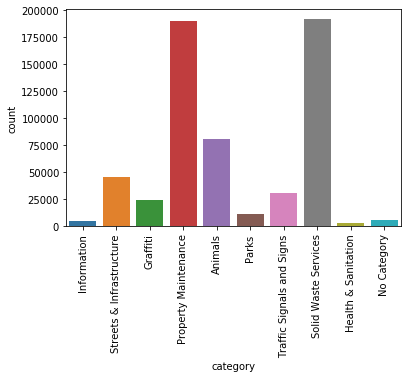

In [200]:
sns.countplot(df.category)
plt.xticks(rotation=90)
plt.show()

> Property Maintenance and Solid Waste Services are by far the most popular calls

In [201]:
df.id.value_counts().value_counts()

1    589878
2        69
Name: id, dtype: int64

> There are some repeat id numbers. Why are some cases input twice? 

In [202]:
dups = df.id [df.id.duplicated()]
len(dups)

69

In [203]:
for dup in dups:
    subset = df [df.id == dup].drop(columns="id")
    print(subset)

         category  open_date   due_date close_date late              dept  \
3782  Information  1/17/2018  1/24/2018        NaN  YES  Customer Service   
3783  Information  1/17/2018  1/24/2018        NaN  YES  Customer Service   

      city_department department_division status            source  \
3782  311 Call Center           Complaint   Open  Constituent Call   
3783  311 Call Center           Complaint   Open  Constituent Call   

                             location  district_no   x_cord    y_cord  \
3782  NB LOOP 410 SW and VALLEY HI DR            4  2082859  13686145   
3783  NB LOOP 410 SW and VALLEY HI DR            0  2082859  13686145   

     start_date   end_date  
3782  11/9/2018  11/9/2019  
3783  11/9/2018  11/9/2019  
                      category  open_date   due_date close_date late  \
5445  Streets & Infrastructure  4/26/2018  2/14/2019  1/10/2019   NO   
5446  Streets & Infrastructure  4/26/2018  2/14/2019  1/10/2019   NO   

                          dept ci

                    category  open_date   due_date close_date late  \
203570  Solid Waste Services  3/15/2019  3/26/2019  3/19/2019   NO   
203571  Solid Waste Services  3/15/2019  3/26/2019  3/19/2019   NO   

                          dept   city_department      department_division  \
203570  Solid Waste Management  Waste Collection  Additional Cart Request   
203571  Solid Waste Management  Waste Collection  Additional Cart Request   

        status            source                               location  \
203570  Closed  Constituent Call  3  GRANBURG PLACE, San Antonio, 78218   
203571  Closed  Constituent Call  3  GRANBURG PLACE, San Antonio, 78218   

        district_no   x_cord    y_cord start_date   end_date  
203570            0  2150586  13732477  11/9/2018  11/9/2019  
203571           10  2150586  13732477  11/9/2018  11/9/2019  
                    category  open_date   due_date close_date late  \
205240  Property Maintenance  3/17/2019  5/21/2019   4/8/2019   NO   
20

                    category  open_date   due_date close_date late  \
467794  Solid Waste Services  8/16/2019  8/21/2019  8/17/2019   NO   
467795  Solid Waste Services  8/16/2019  8/21/2019  8/17/2019   NO   

                          dept   city_department department_division  status  \
467794  Solid Waste Management  Waste Collection           No Pickup  Closed   
467795  Solid Waste Management  Waste Collection           No Pickup  Closed   

                  source                                 location  \
467794  Constituent Call  1951  W GRAMERCY PL, San Antonio, 78201   
467795  Constituent Call  1951  W GRAMERCY PL, San Antonio, 78201   

        district_no   x_cord    y_cord start_date   end_date  
467794            7  2118328  13715884  11/9/2018  11/9/2019  
467795            0  2118328  13715884  11/9/2018  11/9/2019  
                         category  open_date   due_date close_date late  \
468135  Traffic Signals and Signs  8/16/2019  9/16/2019  8/17/2019   NO   
4

>Many differences appear to be the district number being updated. If the district number wasn't updated, I'm unable to tell what is different between 
the duplicates. There are only 69 duplicates. I am just going to delete them completely.

In [204]:
df.drop_duplicates(subset="id",keep=False, inplace=True)
df [df.id.duplicated()]

,category,id,open_date,due_date,close_date,late,dept,city_department,department_division,status,source,location,district_no,x_cord,y_cord,start_date,end_date


> All duplicate `id` rows have been deleted. I will now remove the `id` column completey, as it provides no additional value.

In [205]:
df.drop(columns="id",inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589878 entries, 0 to 590015
Data columns (total 16 columns):
category               589878 non-null object
open_date              589878 non-null object
due_date               589821 non-null object
close_date             563140 non-null object
late                   589878 non-null object
dept                   589737 non-null object
city_department        589878 non-null object
department_division    589878 non-null object
status                 589878 non-null object
source                 589878 non-null object
location               589878 non-null object
district_no            589878 non-null int64
x_cord                 589878 non-null int64
y_cord                 589878 non-null int64
start_date             589878 non-null object
end_date               589878 non-null object
dtypes: int64(3), object(13)
memory usage: 76.5+ MB


##### Convert dates to datetime and analyze

In [206]:
df.open_date.head()

0    10/18/2011
1    10/19/2011
2    10/31/2011
3     12/1/2011
4    12/10/2011
Name: open_date, dtype: object

In [207]:
df.open_date = pd.to_datetime(df.open_date)

In [208]:
df.open_date.dt.year.value_counts()

2019    501717
2018     84495
2017      1627
2016       882
2014       646
2015       279
2013       193
2012        30
2011         9
Name: open_date, dtype: int64

In [209]:
df.open_date.dt.month.value_counts()

6     55035
5     54939
4     54237
7     53788
3     53277
10    51561
8     47029
9     46173
1     46023
2     45498
11    43685
12    38633
Name: open_date, dtype: int64

> As hoped for, most of the cases are current. Are certain types of cases more likely to go unresolved? Will explore that question later.

In [210]:
df.due_date

0         10/27/2011
1         10/28/2011
2         11/10/2011
3         12/13/2011
4         12/11/2011
             ...    
590011    11/26/2019
590012    11/14/2019
590013     1/28/2020
590014    11/15/2019
590015     11/9/2019
Name: due_date, Length: 589878, dtype: object

In [211]:
df.due_date = pd.to_datetime(df.due_date)

In [212]:
df [df.due_date.isnull()]

,category,open_date,due_date,close_date,late,dept,city_department,department_division,status,source,location,district_no,x_cord,y_cord,start_date,end_date
12,Information,2012-01-14,NaT,2/11/2019,NO,City Council,District 6,Request for Research/Information,Closed,Constituent Call,"7443 STONEHOUSE DR, San Antonio, 78227",6,2081547,13703752,11/9/2018,11/9/2019
24,Information,2012-02-24,NaT,2/11/2019,NO,City Council,District 6,Request for Research/Information,Closed,Constituent Call,"6644 TEZEL RD, San Antonio, 78250",6,2075887,13727715,11/9/2018,11/9/2019
27,Information,2012-03-14,NaT,2/11/2019,NO,City Council,District 6,Request for Research/Information,Closed,Constituent Call,"11818 THOROGHBRED TR, San Antonio, 78253",6,2056099,13717134,11/9/2018,11/9/2019
31,Information,2012-03-21,NaT,2/11/2019,NO,City Council,District 6,Request for Research/Information,Closed,Constituent Call,"7926 RUBY MEADOW, San Antonio, 78251",6,2080030,13715880,11/9/2018,11/9/2019
34,Information,2012-05-09,NaT,2/11/2019,NO,City Council,District 6,Request for Research/Information,Closed,Constituent Call,"6103 MILLBANK DR, San Antonio, 78238",6,2093813,13712133,11/9/2018,11/9/2019
35,Information,2012-05-25,NaT,NaN,NO,Knowledge Management,Knowledge,Knowledge Solution Extra,Open,Constituent Call,"310 ROOSEVELT AV, San Antonio, 78210",5,2132295,13693603,11/9/2018,11/9/2019
36,Information,2012-07-18,NaT,2/11/2019,NO,City Council,District 6,Request for Research/Information,Closed,Constituent Call,"9034 RYELLE, San Antonio, 78250",6,2070829,13737531,11/9/2018,11/9/2019
37,Information,2012-08-07,NaT,2/11/2019,NO,City Council,District 6,Request for Research/Information,Closed,Constituent Call,"8238 CREEKLINE DR, San Antonio, 78251",6,2079249,13717918,11/9/2018,11/9/2019
2703,Information,2017-08-01,NaT,NaN,NO,City Council,District 6,Request for Research/Information,Open,Constituent Call,CULEBRA RD and VILLAGE PKWY,6,2079083,13719525,11/9/2018,11/9/2019
2784,Information,2017-08-21,NaT,NaN,NO,City Council,District 9,Request for Research/Information,Open,Constituent Call,"1323 BLUE CREST LN, San Antonio, 78232",9,2135747,13752110,11/9/2018,11/9/2019


In [213]:
for x in df [df.due_date.isnull()].columns:
    print(x)
    print(df [df.due_date.isnull()][x].value_counts())
    print()

category
Information    57
Name: category, dtype: int64

open_date
2018-06-04    3
2018-05-08    2
2019-06-26    2
2018-10-31    2
2017-10-10    2
2019-02-18    2
2019-08-19    2
2018-11-02    2
2012-01-14    1
2018-04-05    1
2018-02-21    1
2019-07-29    1
2018-05-13    1
2017-09-06    1
2018-08-08    1
2019-11-07    1
2012-05-25    1
2018-04-04    1
2019-08-20    1
2018-06-12    1
2018-03-27    1
2017-09-11    1
2019-06-27    1
2012-08-07    1
2017-08-23    1
2018-05-30    1
2019-03-08    1
2018-04-18    1
2012-05-09    1
2018-06-14    1
2018-08-18    1
2018-09-18    1
2012-07-18    1
2018-05-10    1
2019-06-25    1
2018-01-30    1
2012-03-21    1
2017-08-21    1
2018-05-09    1
2019-07-31    1
2018-09-04    1
2012-03-14    1
2019-08-02    1
2018-04-20    1
2012-02-24    1
2017-08-01    1
2019-03-18    1
2019-05-07    1
Name: open_date, dtype: int64

due_date
Series([], Name: due_date, dtype: int64)

close_date
2/11/2019    7
Name: close_date, dtype: int64

late
NO    57
Name: late,

> All the `due_date` nulls are not considered late and appear to be routed to the city council. Do city district calls never get a due date? 

In [214]:
df.dept.value_counts()

Code Enforcement Services    210124
Solid Waste Management       191614
Animal Care Services          81234
Trans & Cap Improvements      77659
Parks and Recreation          13348
Customer Service              10430
Metro Health                   3595
Development Services           1676
City Council                     56
Knowledge Management              1
Name: dept, dtype: int64

> All "City Council" calls do not get a due date. Since there are only 57 nulls, will delete. Should be noted that city council deptment assigned calls never get assigned a due date, though. 

In [215]:
df [df.dept == "City Council"]

,category,open_date,due_date,close_date,late,dept,city_department,department_division,status,source,location,district_no,x_cord,y_cord,start_date,end_date
12,Information,2012-01-14,NaT,2/11/2019,NO,City Council,District 6,Request for Research/Information,Closed,Constituent Call,"7443 STONEHOUSE DR, San Antonio, 78227",6,2081547,13703752,11/9/2018,11/9/2019
24,Information,2012-02-24,NaT,2/11/2019,NO,City Council,District 6,Request for Research/Information,Closed,Constituent Call,"6644 TEZEL RD, San Antonio, 78250",6,2075887,13727715,11/9/2018,11/9/2019
27,Information,2012-03-14,NaT,2/11/2019,NO,City Council,District 6,Request for Research/Information,Closed,Constituent Call,"11818 THOROGHBRED TR, San Antonio, 78253",6,2056099,13717134,11/9/2018,11/9/2019
31,Information,2012-03-21,NaT,2/11/2019,NO,City Council,District 6,Request for Research/Information,Closed,Constituent Call,"7926 RUBY MEADOW, San Antonio, 78251",6,2080030,13715880,11/9/2018,11/9/2019
34,Information,2012-05-09,NaT,2/11/2019,NO,City Council,District 6,Request for Research/Information,Closed,Constituent Call,"6103 MILLBANK DR, San Antonio, 78238",6,2093813,13712133,11/9/2018,11/9/2019
36,Information,2012-07-18,NaT,2/11/2019,NO,City Council,District 6,Request for Research/Information,Closed,Constituent Call,"9034 RYELLE, San Antonio, 78250",6,2070829,13737531,11/9/2018,11/9/2019
37,Information,2012-08-07,NaT,2/11/2019,NO,City Council,District 6,Request for Research/Information,Closed,Constituent Call,"8238 CREEKLINE DR, San Antonio, 78251",6,2079249,13717918,11/9/2018,11/9/2019
2703,Information,2017-08-01,NaT,NaN,NO,City Council,District 6,Request for Research/Information,Open,Constituent Call,CULEBRA RD and VILLAGE PKWY,6,2079083,13719525,11/9/2018,11/9/2019
2784,Information,2017-08-21,NaT,NaN,NO,City Council,District 9,Request for Research/Information,Open,Constituent Call,"1323 BLUE CREST LN, San Antonio, 78232",9,2135747,13752110,11/9/2018,11/9/2019
2799,Information,2017-08-23,NaT,NaN,NO,City Council,District 10,CCO_Request for Research/Information_1,Open,Constituent Call,AUTRY POND and BULVERDE RD,10,2151822,13764486,11/9/2018,11/9/2019


> Will probably make a new column that gives the difference between start date and due date in feature engineering.

In [216]:
df.close_date.head()

0    11/14/2018
1    11/14/2018
2    11/14/2018
3    11/14/2018
4           NaN
Name: close_date, dtype: object

In [217]:
df.close_date.replace(np.nan, "01/01/2199", inplace=True)

In [218]:
df.close_date = pd.to_datetime(df.close_date)

In [219]:
df.close_date.head()

0   2018-11-14
1   2018-11-14
2   2018-11-14
3   2018-11-14
4   2199-01-01
Name: close_date, dtype: datetime64[ns]

In [220]:
df.close_date.dt.year.value_counts(dropna=False)

2019    496632
2018     66508
2199     26738
Name: close_date, dtype: int64

In [221]:
df.close_date.dt.month.value_counts(dropna=False)

1     72384
7     54486
5     53991
6     50982
4     50322
3     48820
8     47195
10    46827
9     44495
2     42234
11    40827
12    37315
Name: close_date, dtype: int64

> Might make separate dataframe with only the open cases. Still leaving in open cases in the original dataframe, replacing nulls with "9999-01-01"

In [225]:
df.late.value_counts()

NO     515137
YES     74741
Name: late, dtype: int64

> To explore later: Which types of requests are late? Why are the late? Predict whether or not a call will be late?

In [226]:
df.dept.value_counts(dropna=False)

Code Enforcement Services    210124
Solid Waste Management       191614
Animal Care Services          81234
Trans & Cap Improvements      77659
Parks and Recreation          13348
Customer Service              10430
Metro Health                   3595
Development Services           1676
NaN                             141
City Council                     56
Knowledge Management              1
Name: dept, dtype: int64

In [227]:
df.city_department.value_counts(dropna=False)

Code Enforcement                 180967
Waste Collection                 146987
Field Operations                  81234
Streets                           31228
Miscellaneous                     29187
Signs and Markings                17003
Signals                           15592
Brush                             13944
Dangerous Premise                 10858
311 Call Center                   10430
Graffiti                          10307
Storm Water                        9971
Shops (Internal)                   9377
Graffiti (IntExp)                  7031
Traffic Engineering Design         3275
Food Establishments                2282
Trades                             2245
Engineering Division               1676
Solid Waste                        1496
Facility License                   1061
Code Enforcement (IntExp)           953
Clean and Green                     873
Tree Crew                           719
Storm Water Engineering             584
Vector                              252


> `city_department` is a subset of `dept`. It doens't make sense that `dept` would have nulls and `city_department` would not. Let's explore those.

In [228]:
# city_department values for the dept nulls
df [df.dept.isnull()].city_department.value_counts()

Code Enforcement (Internal)    129
Historic Preservation           12
Name: city_department, dtype: int64

In [229]:
df [df.dept == "Code Enforcement Services"].city_department.value_counts()

Code Enforcement              180967
Dangerous Premise              10858
Graffiti                       10307
Graffiti (IntExp)               7031
Code Enforcement (IntExp)        953
Dangerous Premise (IntExp)         8
Name: city_department, dtype: int64

> I believe all that the `dept` nulls can be filled with "Code Enforcement Services" for all the columns where the `city_department` is "Code Enforcement (Internal)"

In [230]:
df.dept [df.city_department == "Code Enforcement (Internal)"] = "Code Enforcement Services"

In [231]:
df.dept.value_counts(dropna=False)

Code Enforcement Services    210253
Solid Waste Management       191614
Animal Care Services          81234
Trans & Cap Improvements      77659
Parks and Recreation          13348
Customer Service              10430
Metro Health                   3595
Development Services           1676
City Council                     56
NaN                              12
Knowledge Management              1
Name: dept, dtype: int64

Determine which department "historical preservation" belongs in

In [232]:
for x in df.dept.unique():
    print(x)
    print("---")
    print(df [df.dept == x].city_department.value_counts())
    print()

Customer Service
---
311 Call Center    10430
Name: city_department, dtype: int64

Trans & Cap Improvements
---
Streets                         31228
Signs and Markings              17003
Signals                         15592
Storm Water                      9971
Traffic Engineering Design       3275
Storm Water Engineering           584
Director's Office Horizontal        6
Name: city_department, dtype: int64

City Council
---
District 6     10
District 1      9
District 7      7
District 9      6
District 3      6
District 2      6
District 8      5
District 5      4
District 10     3
Name: city_department, dtype: int64

Knowledge Management
---
Knowledge    1
Name: city_department, dtype: int64

Code Enforcement Services
---
Code Enforcement               180967
Dangerous Premise               10858
Graffiti                        10307
Graffiti (IntExp)                7031
Code Enforcement (IntExp)         953
Code Enforcement (Internal)       129
Dangerous Premise (IntExp)        

> Unsure where to throw historic preservation servies into. Will ceate "Other" deptartment for this group. 

In [233]:
df.dept.replace(np.nan, "Other", inplace=True)

In [234]:
df.isnull().sum()

category                0
open_date               0
due_date               57
close_date              0
late                    0
dept                    0
city_department         0
department_division     0
status                  0
source                  0
location                0
district_no             0
x_cord                  0
y_cord                  0
start_date              0
end_date                0
dtype: int64

#### Drop remaining nulls

In [236]:
df.dropna(inplace=True)

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589821 entries, 0 to 590015
Data columns (total 16 columns):
category               589821 non-null object
open_date              589821 non-null datetime64[ns]
due_date               589821 non-null datetime64[ns]
close_date             589821 non-null datetime64[ns]
late                   589821 non-null object
dept                   589821 non-null object
city_department        589821 non-null object
department_division    589821 non-null object
status                 589821 non-null object
source                 589821 non-null object
location               589821 non-null object
district_no            589821 non-null int64
x_cord                 589821 non-null int64
y_cord                 589821 non-null int64
start_date             589821 non-null object
end_date               589821 non-null object
dtypes: datetime64[ns](3), int64(3), object(10)
memory usage: 76.5+ MB


> All nulls have been addressed

In [248]:
df.department_division.value_counts()

No Pickup                                    53571
Overgrown Yard/Trash                         47026
Cart Exchange Request                        27570
Damaged Cart                                 19237
Front Or Side Yard Parking                   17879
                                             ...  
Barricade - Misc. Special Event/Emergency        1
Stormwater Mowing                                1
Vacant Lot-County (1000)                         1
Organics Property Damage                         1
Non-Compliant Cart Removal                       1
Name: department_division, Length: 325, dtype: int64

In [249]:
df.department_division.nunique()

325

> There are a lot of department divisions. Will most likely break down by city department later. 

In [250]:
df.status.value_counts()

Closed    563133
Open       26688
Name: status, dtype: int64

> This data is reflected in the `close_date` column. May be deleted. 

In [251]:
df.source.value_counts()

Constituent Call              402728
Internal Services Requests    115469
Web Portal                     71358
311 Mobile App                   266
Name: source, dtype: int64

> Does the source affect how quickly an issue is addressed? 

In [252]:
df.location.value_counts()

939  MARBLE POINT, San Antonio, 78251       3085
10133  FIGARO CANYON, San Antonio, 78251    1647
5800  ENRIQUE M BARR, San Antonio, 78227    1166
861  BARREL POINT, San Antonio, 78251       1077
834  BARREL POINT, San Antonio, 78251       1062
                                            ... 
1118  CLOVIS PLACE, San Antonio, 78221         1
2926  ASHBY PLACE W, San Antonio, 78228        1
247  LATCH DR, San Antonio, 78213              1
3200  GOLDEN AVE, San Antonio, 78211           1
5575  RANGELAND, San Antonio, 78247            1
Name: location, Length: 221667, dtype: int64

> Very specific location address. How difficult would it be to see these on a map? 

In [253]:
df.district_no.value_counts()

1     86071
2     79715
5     76726
3     72802
4     66873
7     52046
6     50844
10    43589
8     30122
9     29111
0      1922
Name: district_no, dtype: int64

> There is no 0 district in San Antonio. Is it an 'other/unknown' category? What's the population of each district to service calls?

In [254]:
df.x_cord.nunique()

89489

In [255]:
df.y_cord.nunique()

88828

> It'll probably be easier to plot coordinates than addresses! Will most likely delete addresses.

In [256]:
df.start_date.value_counts()

11/9/2018    589821
Name: start_date, dtype: int64

In [257]:
df.end_date.value_counts()

11/9/2019    589821
Name: end_date, dtype: int64

> `start_date` and `end_date` are reflective overall data and do not provide any additional information. Both columns will be deleted. 

In [258]:
df.drop(columns=["start_date","end_date"], inplace=True)

> All columns are free of nulls and ready for proper exploration

## Feature Engineering

In [259]:
df_open_cases = df [df.close_date == "2199-01-01"]

In [260]:
df_open_cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26688 entries, 4 to 590014
Data columns (total 14 columns):
category               26688 non-null object
open_date              26688 non-null datetime64[ns]
due_date               26688 non-null datetime64[ns]
close_date             26688 non-null datetime64[ns]
late                   26688 non-null object
dept                   26688 non-null object
city_department        26688 non-null object
department_division    26688 non-null object
status                 26688 non-null object
source                 26688 non-null object
location               26688 non-null object
district_no            26688 non-null int64
x_cord                 26688 non-null int64
y_cord                 26688 non-null int64
dtypes: datetime64[ns](3), int64(3), object(8)
memory usage: 3.1+ MB


## Explore

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589821 entries, 0 to 590015
Data columns (total 14 columns):
category               589821 non-null object
open_date              589821 non-null datetime64[ns]
due_date               589821 non-null datetime64[ns]
close_date             589821 non-null datetime64[ns]
late                   589821 non-null object
dept                   589821 non-null object
city_department        589821 non-null object
department_division    589821 non-null object
status                 589821 non-null object
source                 589821 non-null object
location               589821 non-null object
district_no            589821 non-null int64
x_cord                 589821 non-null int64
y_cord                 589821 non-null int64
dtypes: datetime64[ns](3), int64(3), object(8)
memory usage: 67.5+ MB


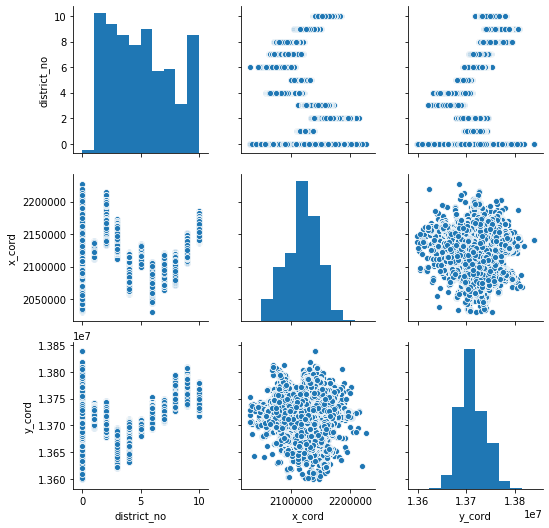

In [262]:
sns.pairplot(df)
plt.show()

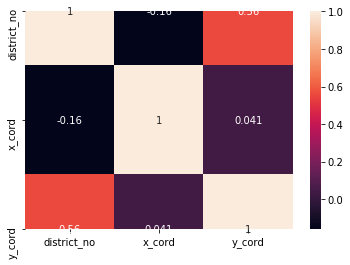

In [264]:
sns.heatmap(df.corr(), annot=True)
plt.show()

#### Are service calls accurately split up by district?

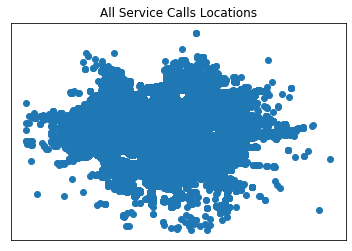

In [265]:
plt.scatter(x=df.x_cord, y=df.y_cord)
plt.title("All Service Calls Locations")
plt.xticks([])
plt.yticks([])
plt.show()

In [266]:
bbox = (df.x_cord.min(), df.x_cord.max(),df.y_cord.min(), df.y_cord.max())
bbox

(2030619, 2227562, 13599438, 13837759)

In [267]:
img = plt.imread("sa_map.png")

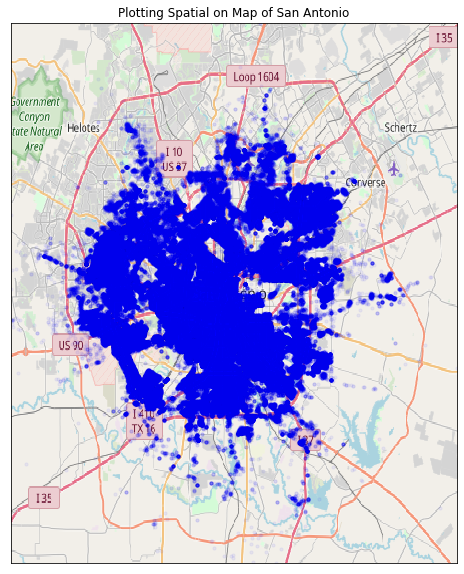

In [268]:
fig, ax = plt.subplots(figsize = (8,12))
ax.scatter(df.x_cord, df.y_cord, zorder=1, alpha= 0.05, c='b', s=10)
ax.set_title('Plotting Spatial on Map of San Antonio')
ax.set_xlim(bbox[0],bbox[1])
ax.set_ylim(bbox[2],bbox[3])
ax.imshow(img, zorder=0, extent = bbox, aspect= 'equal')
plt.yticks([])
plt.xticks([])
plt.show()

> This is San Antonio, yo!

#### Service calls split up by designated district

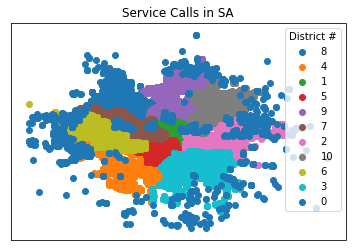

In [269]:
for no in df.district_no.unique():
    subset = df[df.district_no == no]
    plt.scatter(subset.x_cord, subset.y_cord, label=no)
plt.title("Service Calls in SA")
plt.legend(title="District #")
plt.xticks([])
plt.yticks([])
plt.show()

> It is seen that the blue dots are everywhere and are labeled as district number 8 and 0. Since we know that 0 is not an actual district, let's look at this plot without district 0

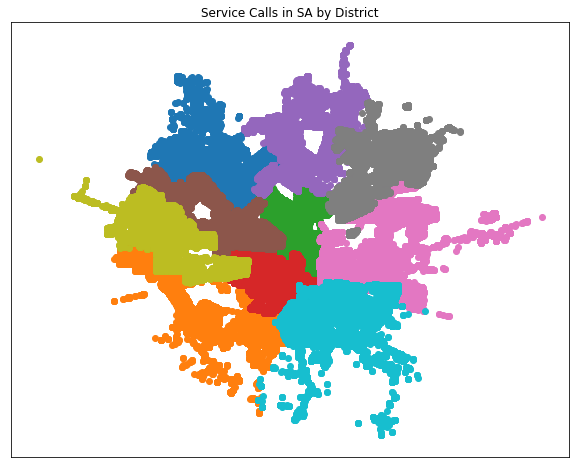

In [270]:
plt.figure(figsize=(10,8))
for no in df.district_no.unique():
    if no != 0:
        subset = df[df.district_no == no]
        plt.scatter(subset.x_cord, subset.y_cord, label=no)
plt.title("Service Calls in SA by District")
plt.xticks([])
plt.yticks([])
plt.show()

> It appears service calls are accurately labeled by district. Yay!

In [271]:
df.drop(columns="location", inplace=True)

> Dropping the `location` column, as it doesn't provide additional information from the x and y coordinates. 